In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
tab2c = pd.read_excel('GP_APPT_Publication_April_2021.xlsx', sheet_name= 'Table 2c', header= 12, nrows= 30,
                usecols= ['__', 'Appointment_Date', 'Total Count of Appointments', 'Face-to-Face', 'Home Visit', 'Telephone', 'Video/Online', 'Unknown'])

tab2c.rename(columns = {'__': 'Day', 'Total Count of Appointments': 'Total_Appointments', 'Face-to-Face': 'Face_to_Face', 'Home Visit': 'Home_Visit'}, inplace=True)

tab2c.head()

,Day,Appointment_Date,Total_Appointments,Face_to_Face,Home_Visit,Telephone,Video/Online,Unknown
0,Thu,2021-04-01,1141269,626211,6915,459513,4238,44392
1,Fri,2021-04-02,15534,11956,197,2380,42,959
2,Sat,2021-04-03,20654,13671,54,5812,175,942
3,Sun,2021-04-04,3418,1937,102,1127,57,195
4,Mon,2021-04-05,4897,3249,67,1501,26,54


In [3]:
tab2c.tail()

,Day,Appointment_Date,Total_Appointments,Face_to_Face,Home_Visit,Telephone,Video/Online,Unknown
25,Mon,2021-04-26,1342346,714863,7863,570544,5512,43564
26,Tue,2021-04-27,1253917,693596,7895,505897,5180,41349
27,Wed,2021-04-28,1171524,652261,7812,468229,4690,38532
28,Thu,2021-04-29,1179655,657901,7067,470889,4739,39059
29,Fri,2021-04-30,1157348,631889,6303,475676,4737,38743


In [4]:
tab2c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Day                 30 non-null     object        
 1   Appointment_Date    30 non-null     datetime64[ns]
 2   Total_Appointments  30 non-null     int64         
 3   Face_to_Face        30 non-null     int64         
 4   Home_Visit          30 non-null     int64         
 5   Telephone           30 non-null     int64         
 6   Video/Online        30 non-null     int64         
 7   Unknown             30 non-null     int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 2.0+ KB


In [5]:
tab2c.describe()

,Total_Appointments,Face_to_Face,Home_Visit,Telephone,Video/Online,Unknown
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000
mean,7.934171e+05,435160.800000,4960.866667,322768.600000,3200.533333,27326.266667
std,5.558830e+05,300497.371028,3508.356327,231262.508734,2197.497161,18883.530759
min,3.418000e+03,1937.000000,4.000000,1127.000000,26.000000,54.000000
25%,5.541650e+04,42321.750000,230.750000,8236.500000,158.500000,2679.750000
50%,1.135372e+06,621806.500000,6968.000000,459239.500000,4398.500000,38637.500000
75%,1.173124e+06,650671.000000,7716.000000,474479.250000,4789.250000,41292.000000
max,1.342346e+06,714863.000000,8385.000000,570544.000000,5512.000000,44460.000000


In [6]:
t2cm = tab2c.mean()

<ipython-input-6-ad309369cbd6>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  t2cm = tab2c.mean()


Text(0.5, 1.0, 'Average Appointment Method April 2021')

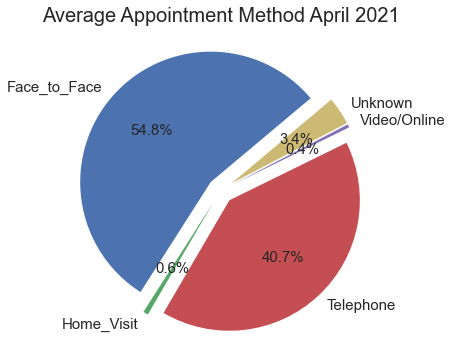

In [7]:
t2cm[1:6].plot.pie(figsize= [10,6], fontsize= 15, explode= [0.1]*5, autopct= '%1.1f%%', startangle= 40, ylabel= ' ').set_title('Average Appointment Method April 2021', fontsize= 20)

In [8]:
def percentsplit(columns):
    pct1 = round((columns[1]/columns[0])*100, 2)
    pct2 = round((columns[2]/columns[0])*100, 2)
    pct3 = round((columns[3]/columns[0])*100, 2)
    pct4 = round((columns[4]/columns[0])*100, 2)
    pct5 = round((columns[5]/columns[0])*100, 2)
    return pct1, pct2, pct3, pct4, pct5

In [9]:
t2cpct = tab2c[['Total_Appointments', 'Face_to_Face', 'Home_Visit', 'Telephone', 'Video/Online', 'Unknown']].apply(percentsplit, axis= 1)

In [10]:
t2cp = pd.DataFrame(t2cpct.apply(pd.Series))
t2cp.columns=['Percent_Face_to_Face', 'Percent_Home_Visit', 'Percent_Telephone', 'Percent_Video/Online', 'Percent_Unknown']

In [11]:
t2cp.head()

,Percent_Face_to_Face,Percent_Home_Visit,Percent_Telephone,Percent_Video/Online,Percent_Unknown
0,54.87,0.61,40.26,0.37,3.89
1,76.97,1.27,15.32,0.27,6.17
2,66.19,0.26,28.14,0.85,4.56
3,56.67,2.98,32.97,1.67,5.71
4,66.35,1.37,30.65,0.53,1.10


In [12]:
t2cp = t2cp.join(tab2c['Appointment_Date'], on= t2cp.index)

In [13]:
t2cp = t2cp[['Appointment_Date', 'Percent_Face_to_Face', 'Percent_Home_Visit', 'Percent_Telephone', 'Percent_Video/Online', 'Percent_Unknown']]
t2cp.head()

,Appointment_Date,Percent_Face_to_Face,Percent_Home_Visit,Percent_Telephone,Percent_Video/Online,Percent_Unknown
0,2021-04-01,54.87,0.61,40.26,0.37,3.89
1,2021-04-02,76.97,1.27,15.32,0.27,6.17
2,2021-04-03,66.19,0.26,28.14,0.85,4.56
3,2021-04-04,56.67,2.98,32.97,1.67,5.71
4,2021-04-05,66.35,1.37,30.65,0.53,1.10


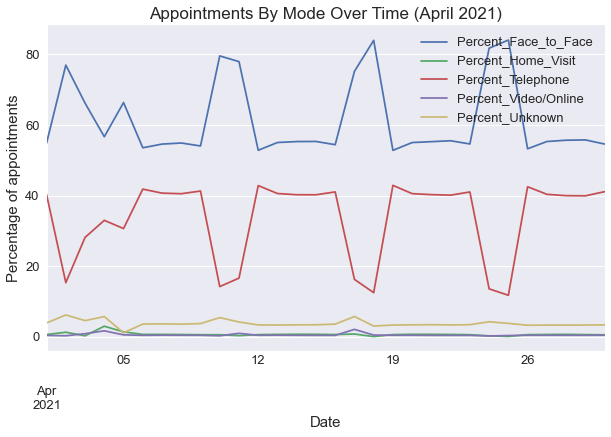

In [14]:
plt = t2cp.plot(kind='line',x= 'Appointment_Date', y= ['Percent_Face_to_Face', 'Percent_Home_Visit', 'Percent_Telephone', 'Percent_Video/Online', 'Percent_Unknown'], 
figsize= [10,6], fontsize= 13, grid= True)

plt.set_title('Appointments By Mode Over Time (April 2021)', fontsize= 17)
plt.set_ylabel('Percentage of appointments', fontsize= 15)
plt.set_xlabel('Date', fontsize= 15)
plt.legend(fontsize= 13)

<ipython-input-15-61b0fffc3752>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fig= tab2c.groupby(['Day'])['Face_to_Face', 'Home_Visit', 'Telephone', 'Video/Online', 'Unknown'].sum().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri' ,'Sat' ,'Sun']).plot(kind= 'bar', figsize= [12,8], fontsize= 13)


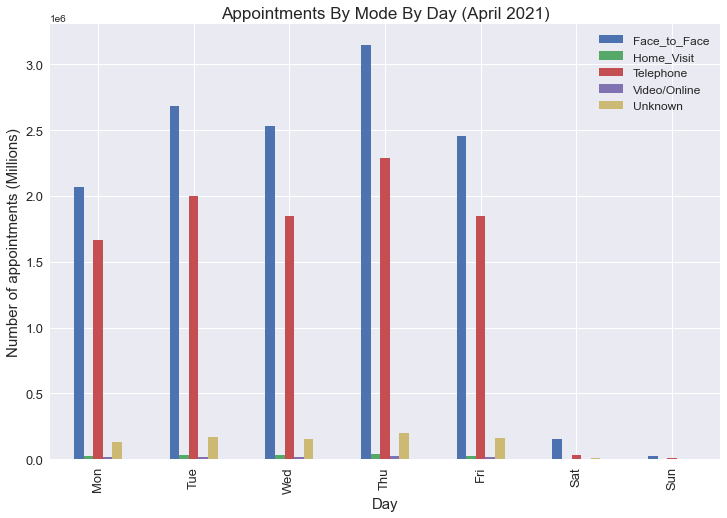

In [15]:
fig= tab2c.groupby(['Day'])['Face_to_Face', 'Home_Visit', 'Telephone', 'Video/Online', 'Unknown'].sum().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri' ,'Sat' ,'Sun']).plot(kind= 'bar', figsize= [12,8], fontsize= 13)

fig.set_title('Appointments By Mode By Day (April 2021)', fontsize= 17)
fig.set_xlabel('Day', fontsize= 15)
fig.set_ylabel('Number of appointments (Millions)', fontsize= 15)
fig.legend(fontsize= 12)

### Table 2c

As one might expect, Face-to-face and telephone appointments are the most common point of contact.

The 'Appointments By Mode' Graph seems to oscilate at regular intervals resulting in a spike in Face-to-Face appointments and a dip in Telephone appointments, This is likely due to there being very few appointments on the weekends, since the 'Appointments By Mode' graph plots percentages it does not represent the quantity of appointments each day

It was interesting to see just how small a fraction Video/Online appointments take up. I would have expected more given there is more information available to the professional in a video call through gesture and appearance as opposed to relying on the patients description of their problem.